# Voltage Sag Caused by Fault

This notebook shows the simulated voltage sag events, caused by fault.

In [1]:
import andes

In [2]:
!andes misc --version

Python  3.12.0
andes   1.9.3
numpy   1.26.0
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.13.1
pandas  2.2.2
numba   0.60.0


In [3]:
%matplotlib inline

In [4]:
andes.config_logger(stream_level=20)

In [5]:
ss = andes.load(andes.get_case('ieee14/ieee14_fault.xlsx'),
                setup=True, no_output=True, default_config=True)

Working directory: "/Users/jinningwang/work/demo/demo/misc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 12 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.1003 seconds.
Parsing input file "/Users/jinningwang/work/miniconda3/envs/amsre/lib/python3.12/site-packages/andes/cases/ieee14/ieee14_fault.xlsx"...
Input file parsed in 0.1992 seconds.
System internal structure set up in 0.0186 seconds.


There is a fault occured at 1s.

In [6]:
ss.Fault.as_df()

,idx,u,name,bus,tf,tc,xf,rf
uid,,,,,,,,
0,1,1.0,Fault_1,9,1.0,1.1,0.0001,0.0


In [7]:
ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0029 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.964193111e-12
Converged in 4 iterations in 0.0028 seconds.


True

In [8]:
ss.TDS.run()

Initialization for dynamics completed in 0.0178 seconds.
Initialization was successful.


  0%|          | 0/100 [00:00<?, ?%/s]

<Fault 1>: Applying fault on Bus (idx=9) at t=1.0 sec.
<Fault 1>: Clearing fault on Bus (idx=9) at t=1.1 sec.


Simulation to t=20.00 sec completed in 0.4462 seconds.


True

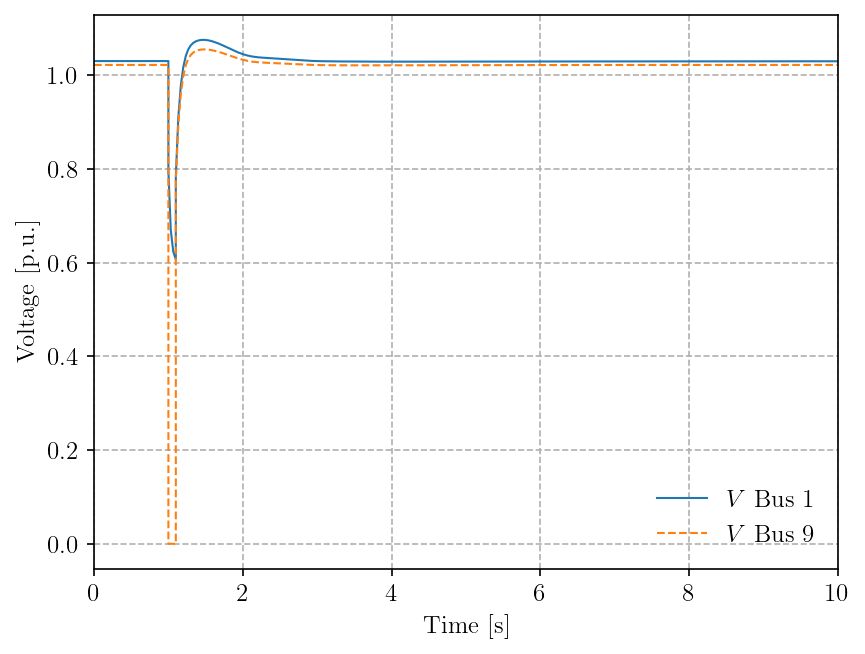

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Time [s]', ylabel='Voltage [p.u.]'>)

In [9]:
ss.TDS.plt.plot(ss.Bus.v,
                dpi=150,
                a=(0,8,),
                grid=True, ylabel='Voltage [p.u.]',
                right=10)